# Step #1 Load the Data

In [28]:
# import necessary libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_string_dtype
import pandas as pd
import math
import seaborn as sns

# load customer data
customer_df = pd.read_csv("data/customer/customer_health_insurance.csv")
customer_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# Step #2 Explore the Data

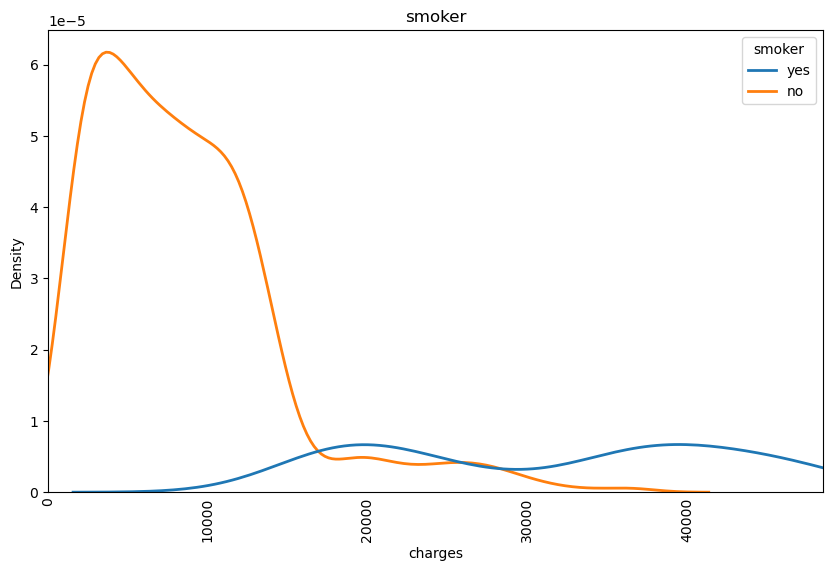

In [38]:
def make_kdeplot(df, column_name, target_name):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=df, hue=column_name, x=target_name, ax = ax, linewidth=2,)
    ax.tick_params(axis="x", rotation=90, labelsize=10, length=0)
    ax.set_title(column_name)
    ax.set_xlim(0, df[target_name].quantile(0.99))
    plt.show()

# make kde plot for ext_color 
make_kdeplot(customer_df, 'smoker', 'charges')

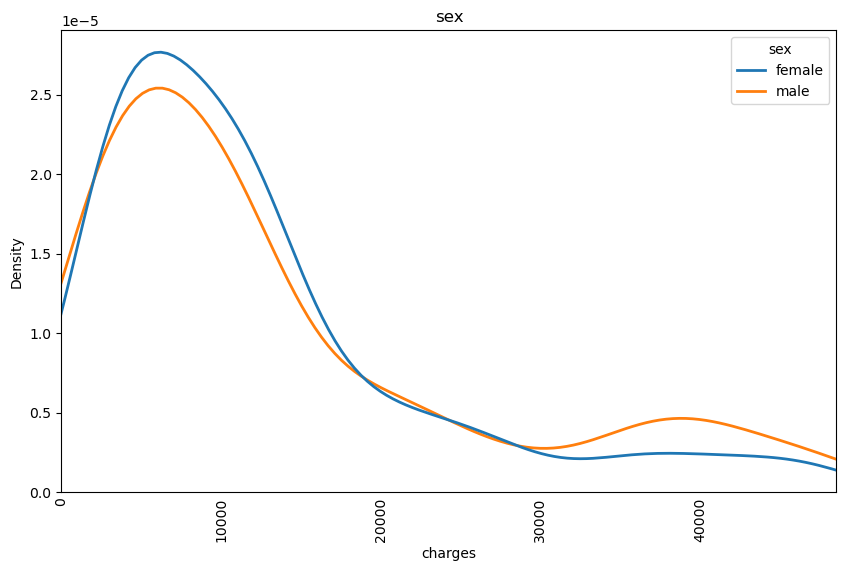

In [39]:
# make kde plot for ext_color 
make_kdeplot(customer_df, 'sex', 'charges')

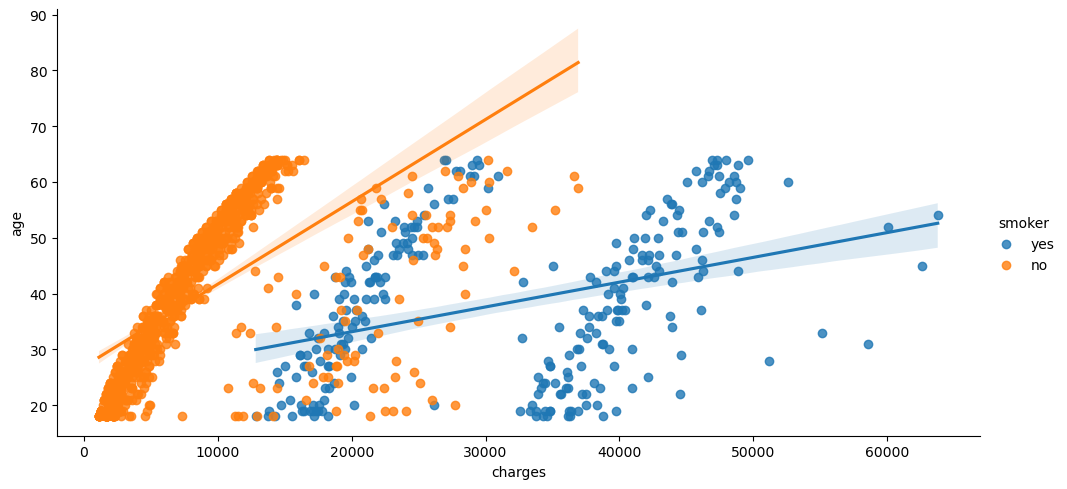

In [72]:
sns.lmplot(x="charges", y="age", hue="smoker", data=customer_df, aspect=2)
plt.show()

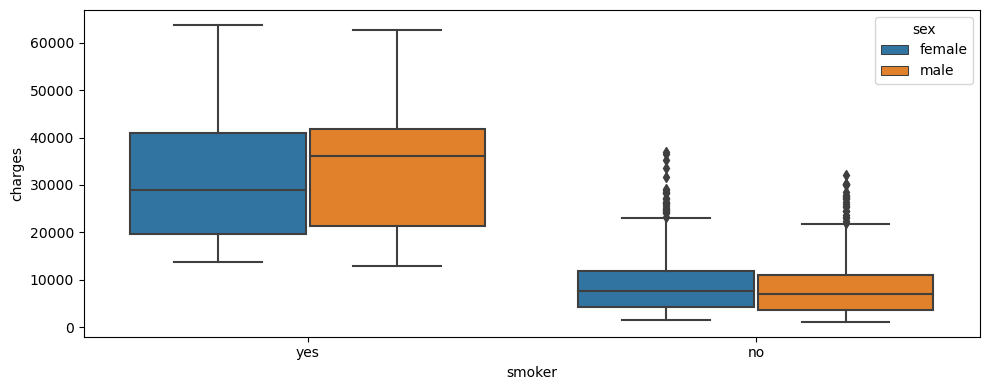

In [52]:
def make_boxplot(customer_df, x,y,h):
    fig, ax = plt.subplots(figsize=(10,4))
    box = sns.boxplot(x=x, y=y, hue=h, data=customer_df)
    box.set_xticklabels(box.get_xticklabels())
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

make_boxplot(customer_df, "smoker", "charges", "sex")

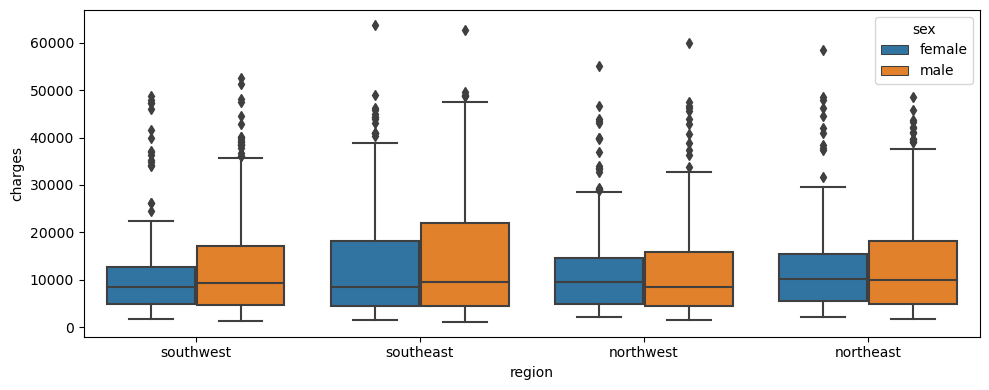

In [73]:
make_boxplot(customer_df, "region", "charges", "sex")

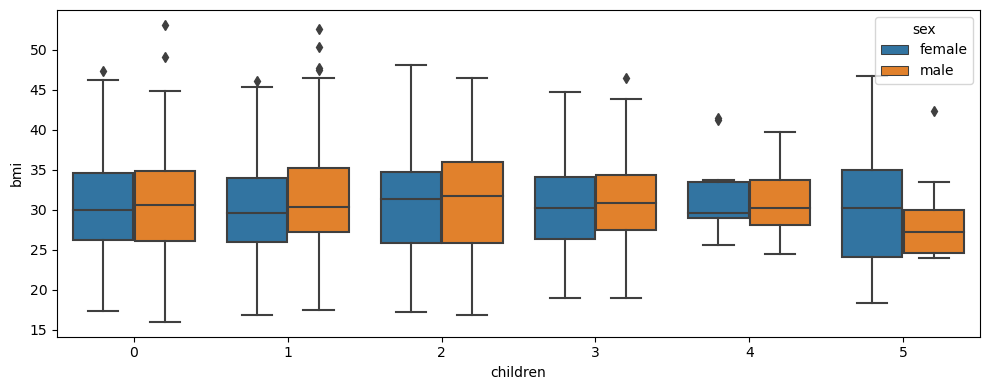

In [75]:
make_boxplot(customer_df, "children", "bmi", "sex")

# Step #3 Prepare the Data

In [76]:
# select relevant features
label_encoder = LabelEncoder()

for col_name in customer_df.columns:
    if (is_string_dtype(customer_df[col_name])):
        customer_df[col_name] = label_encoder.fit_transform(customer_df[col_name])
customer_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [77]:
# select features
X = customer_df # we will select all features

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step #4 Train a Hierarchical Clustering Model

In [92]:
# apply hierarchical clustering
model = AgglomerativeClustering(n_custers=None, distance_threshold=50)
predictions = model.fit_predict(X_scaled)

# Step #5 Visualize the Results

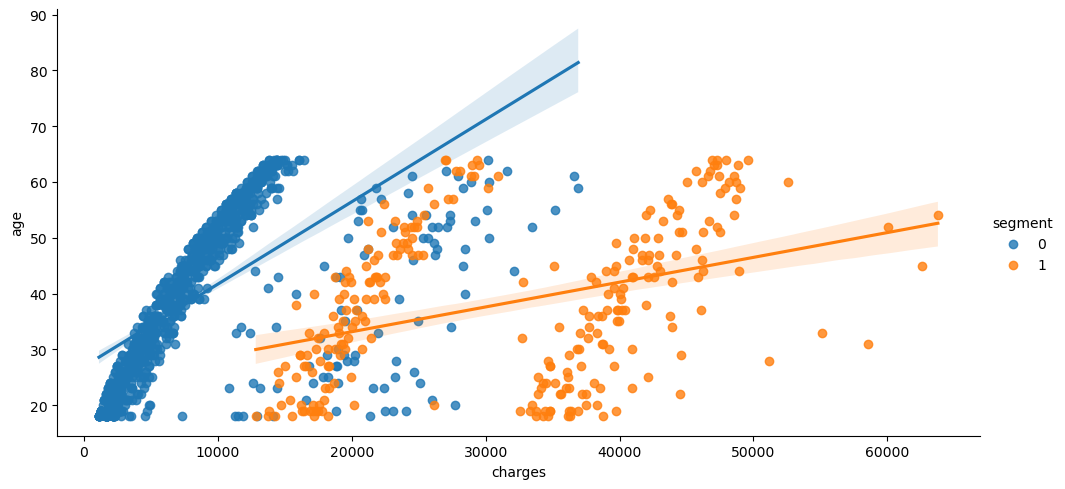

In [93]:
# add predictions to data as a new column
customer_df['segment'] = predictions

# create a scatter plot of the first two features, colored by segment
sns.lmplot(x="charges", y="age", hue="segment", data=customer_df, aspect=2)
plt.show()